#Initial setup - Checking requirements

In [ ]:
#managing and monitoring GPU devices
!nvidia-smi

/bin/bash: /home/virtualmachine2/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Fri Jul 26 01:06:59 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:03:00.0 Off |                  N/A |
|  0%   40C    P8    17W / 225W |      9MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+---------------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/home/virtualmachine2/Desktop/Hiba


In [ ]:
#Check if CUDA (NVIDIA's parallel computing API) is available on your system
import torch, gc
torch.cuda.is_available()


True

#Initial setup - Installing Yolov8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.9.18 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 2080, 7844MiB)
Setup complete ✅ (8 CPUs, 26.4 GB RAM, 303.5/342.9 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

#Importing dataset from Roboflow

In [ ]:
!mkdir {HOME}/stresspr
%cd {HOME}/stresspr

!pip install roboflow --quiet

/bin/bash: /home/virtualmachine2/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
mkdir: cannot create directory ‘/home/virtualmachine2/Desktop/Hiba/stresspr’: File exists
/home/virtualmachine2/Desktop/Hiba/stresspr
/bin/bash: /home/virtualmachine2/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


/home/virtualmachine2/miniconda3/envs/gpu-env/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Reason for being yanked: deprecated, use 4.8.0.76


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="XJiIRqJP0gJvY2WaRPVA")
project = rf.workspace("camelstress").project("camel-behavior")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


#Model training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/home/virtualmachine2/Desktop/Hiba
/bin/bash: /home/virtualmachine2/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
New https://pypi.org/project/ultralytics/8.2.58 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.9.18 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 2080, 7844MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/virtualmachine2/Desktop/Hiba/stresspr/camel-behavior-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, p

In [ ]:
!ls -la {HOME}/runs/detect/train40

/bin/bash: /home/virtualmachine2/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
total 9320
drwxrwxr-x  3 virtualmachine2 virtualmachine2   4096 يول 16 15:43 .
drwxrwxr-x 46 virtualmachine2 virtualmachine2   4096 يول 16 17:41 ..
-rw-rw-r--  1 virtualmachine2 virtualmachine2   1452 يول 16 13:26 args.yaml
-rw-rw-r--  1 virtualmachine2 virtualmachine2 189004 يول 16 15:43 confusion_matrix_normalized.png
-rw-rw-r--  1 virtualmachine2 virtualmachine2 173653 يول 16 15:43 confusion_matrix.png
-rw-rw-r--  1 virtualmachine2 virtualmachine2 169320 يول 16 15:43 F1_curve.png
-rw-rw-r--  1 virtualmachine2 virtualmachine2 213256 يول 16 13:26 labels_correlogram.jpg
-rw-rw-r--  1 virtualmachine2 virtualmachine2 114766 يول 16 13:26 labels.jpg
-rw-rw-r--  1 virtualmachine2 virtualmachine2 135550 يول 16 15:43 P_curve.png
-rw-rw-r--  1 virtualmachine2 virtualmachine2 143659 يول 16 15:43 PR_curve.png
-rw-rw-r--  1 virtualmachine2 virtualmachine2 168038 يول 16 15:43 R_c

#Results

In [ ]:
!cat {HOME}/runs/detect/train40/results.csv | head -10

/bin/bash: /home/virtualmachine2/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
                  epoch,         train/box_loss,         train/cls_loss,         train/dfl_loss,   metrics/precision(B),      metrics/recall(B),       metrics/mAP50(B),    metrics/mAP50-95(B),           val/box_loss,           val/cls_loss,           val/dfl_loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 1.4078,                 1.7944,                 1.2595,                0.72027,                0.82126,                0.85576,                0.55785,                 1.0772,                0.81471,                    1.1,             0.00033157,             0.00033157,             0.00033157
                      2,                 1.0646,                0.77401,                 1.1003,                0.77194,                0.90361,                0.89623,                0.62514,                

/home/virtualmachine2/Desktop/Hiba


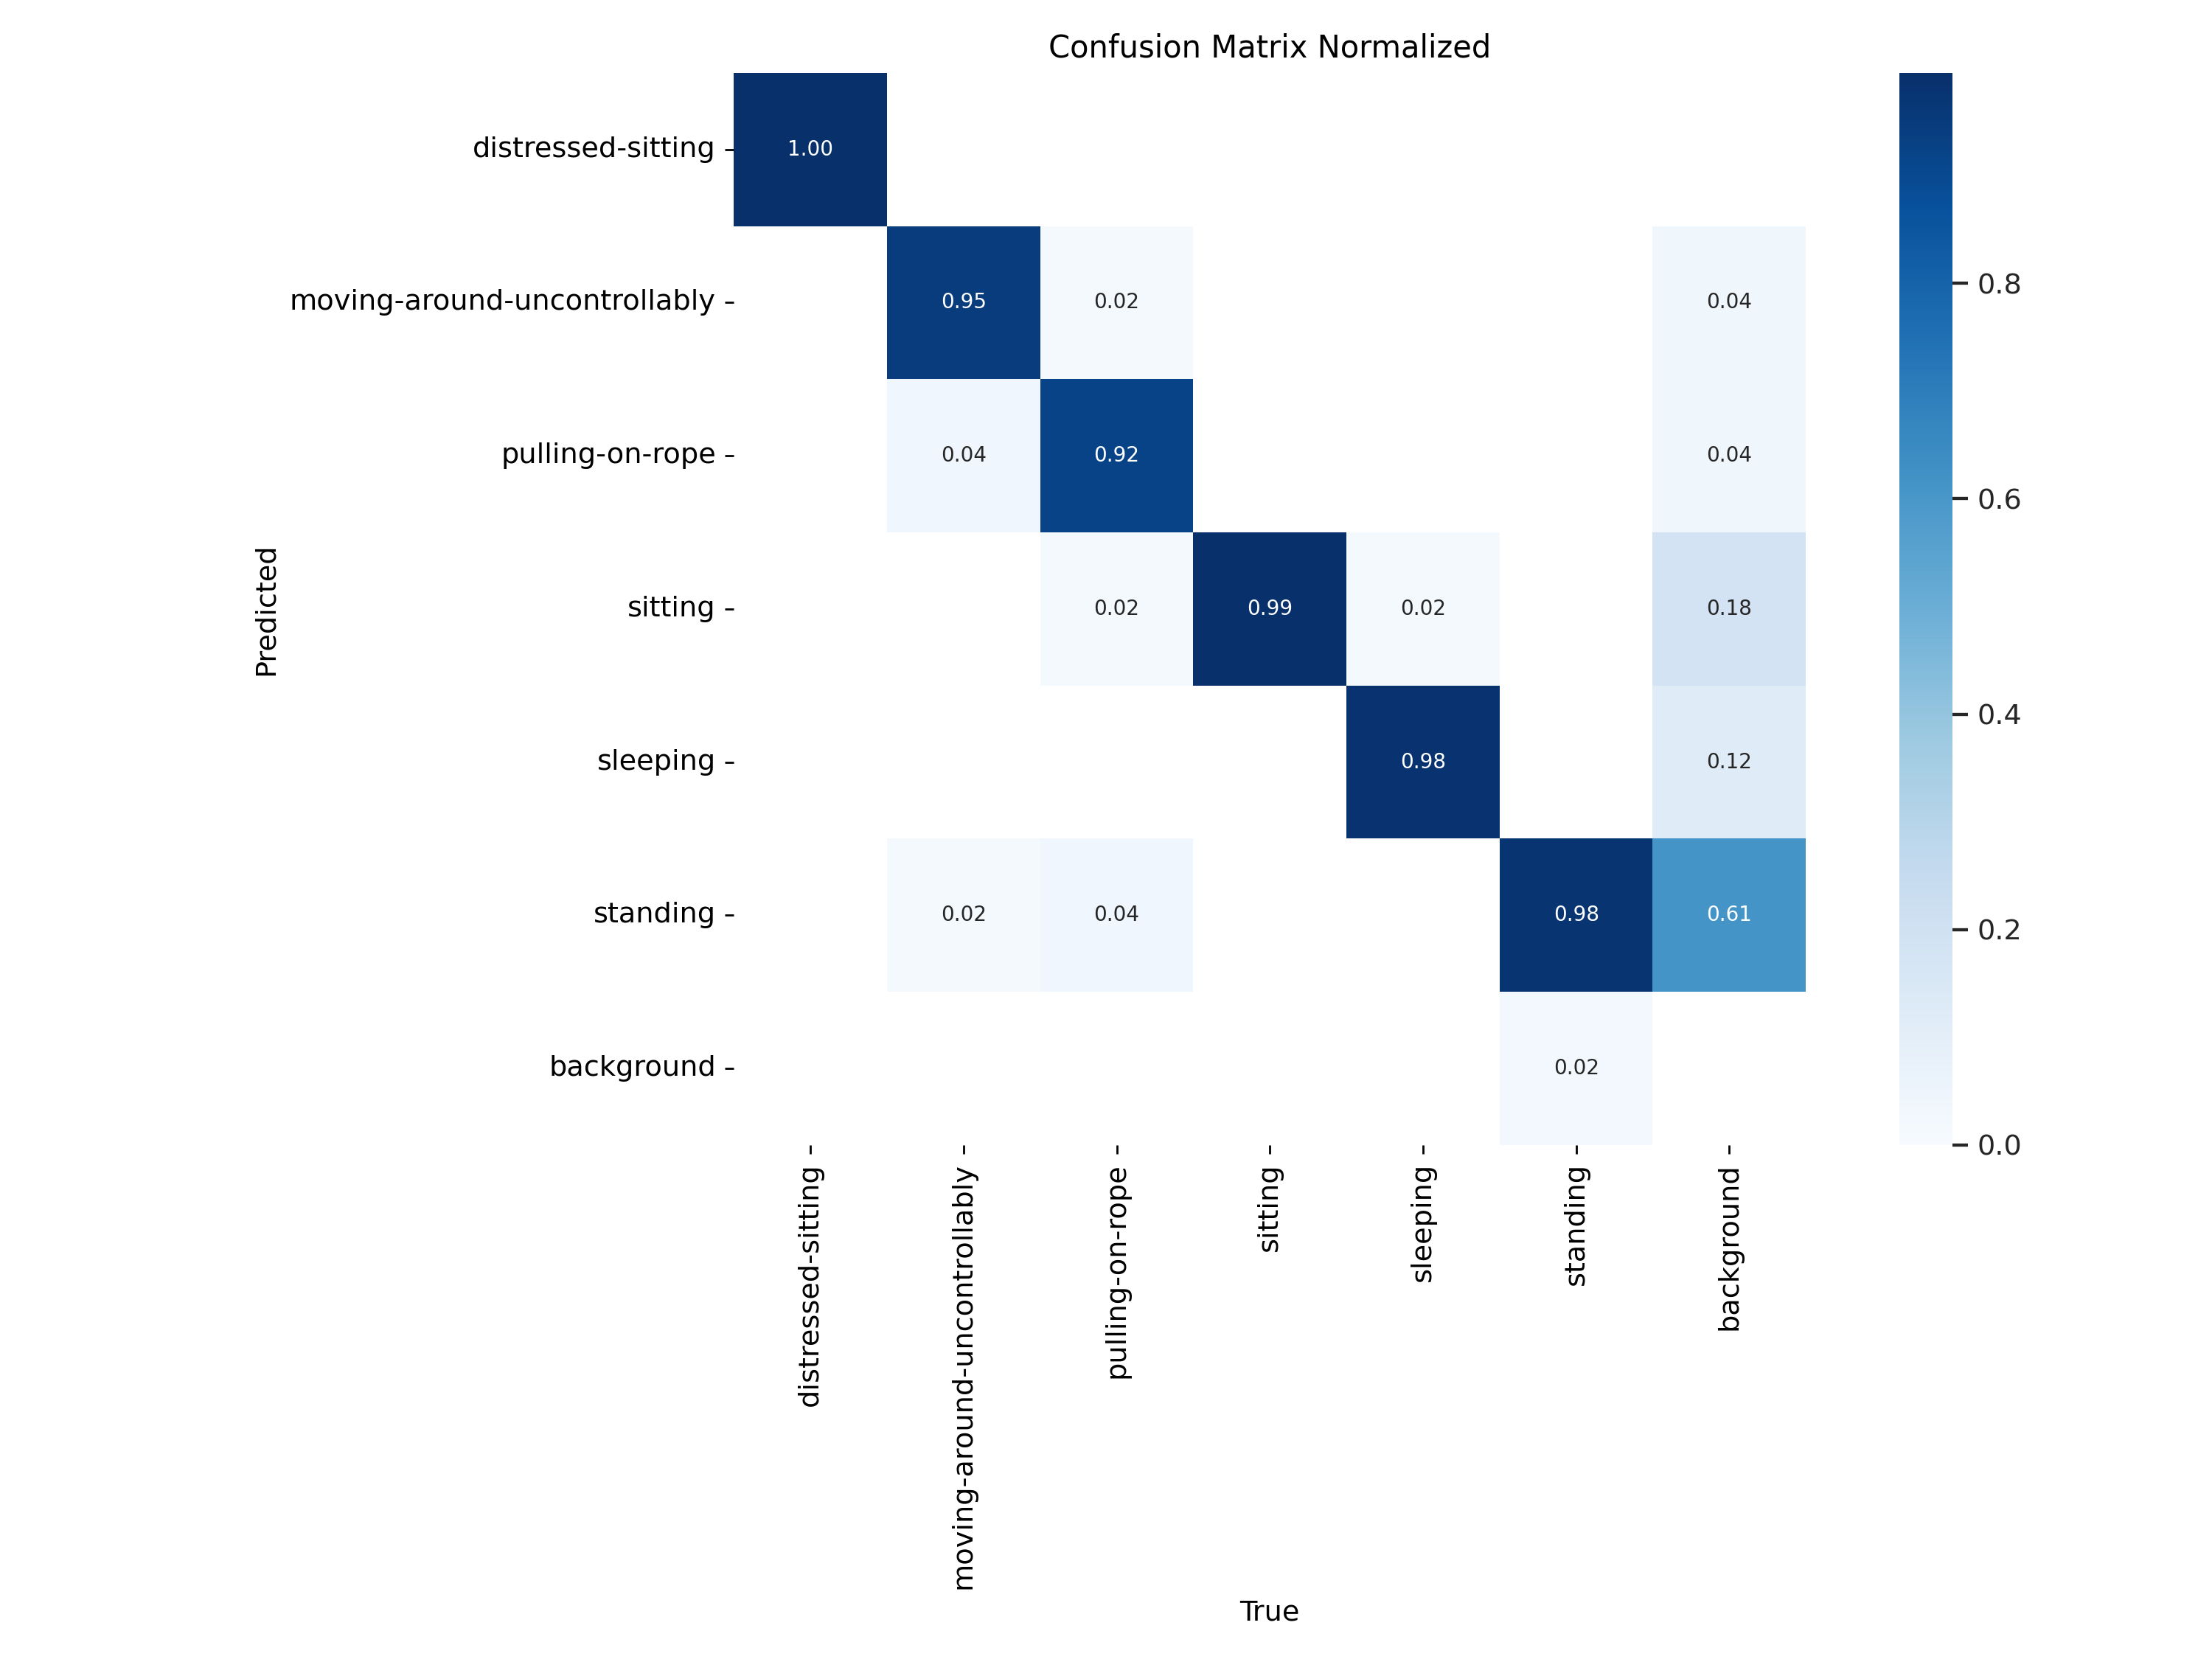

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train40/confusion_matrix_normalized.png', width=800)

/home/virtualmachine2/Desktop/Hiba


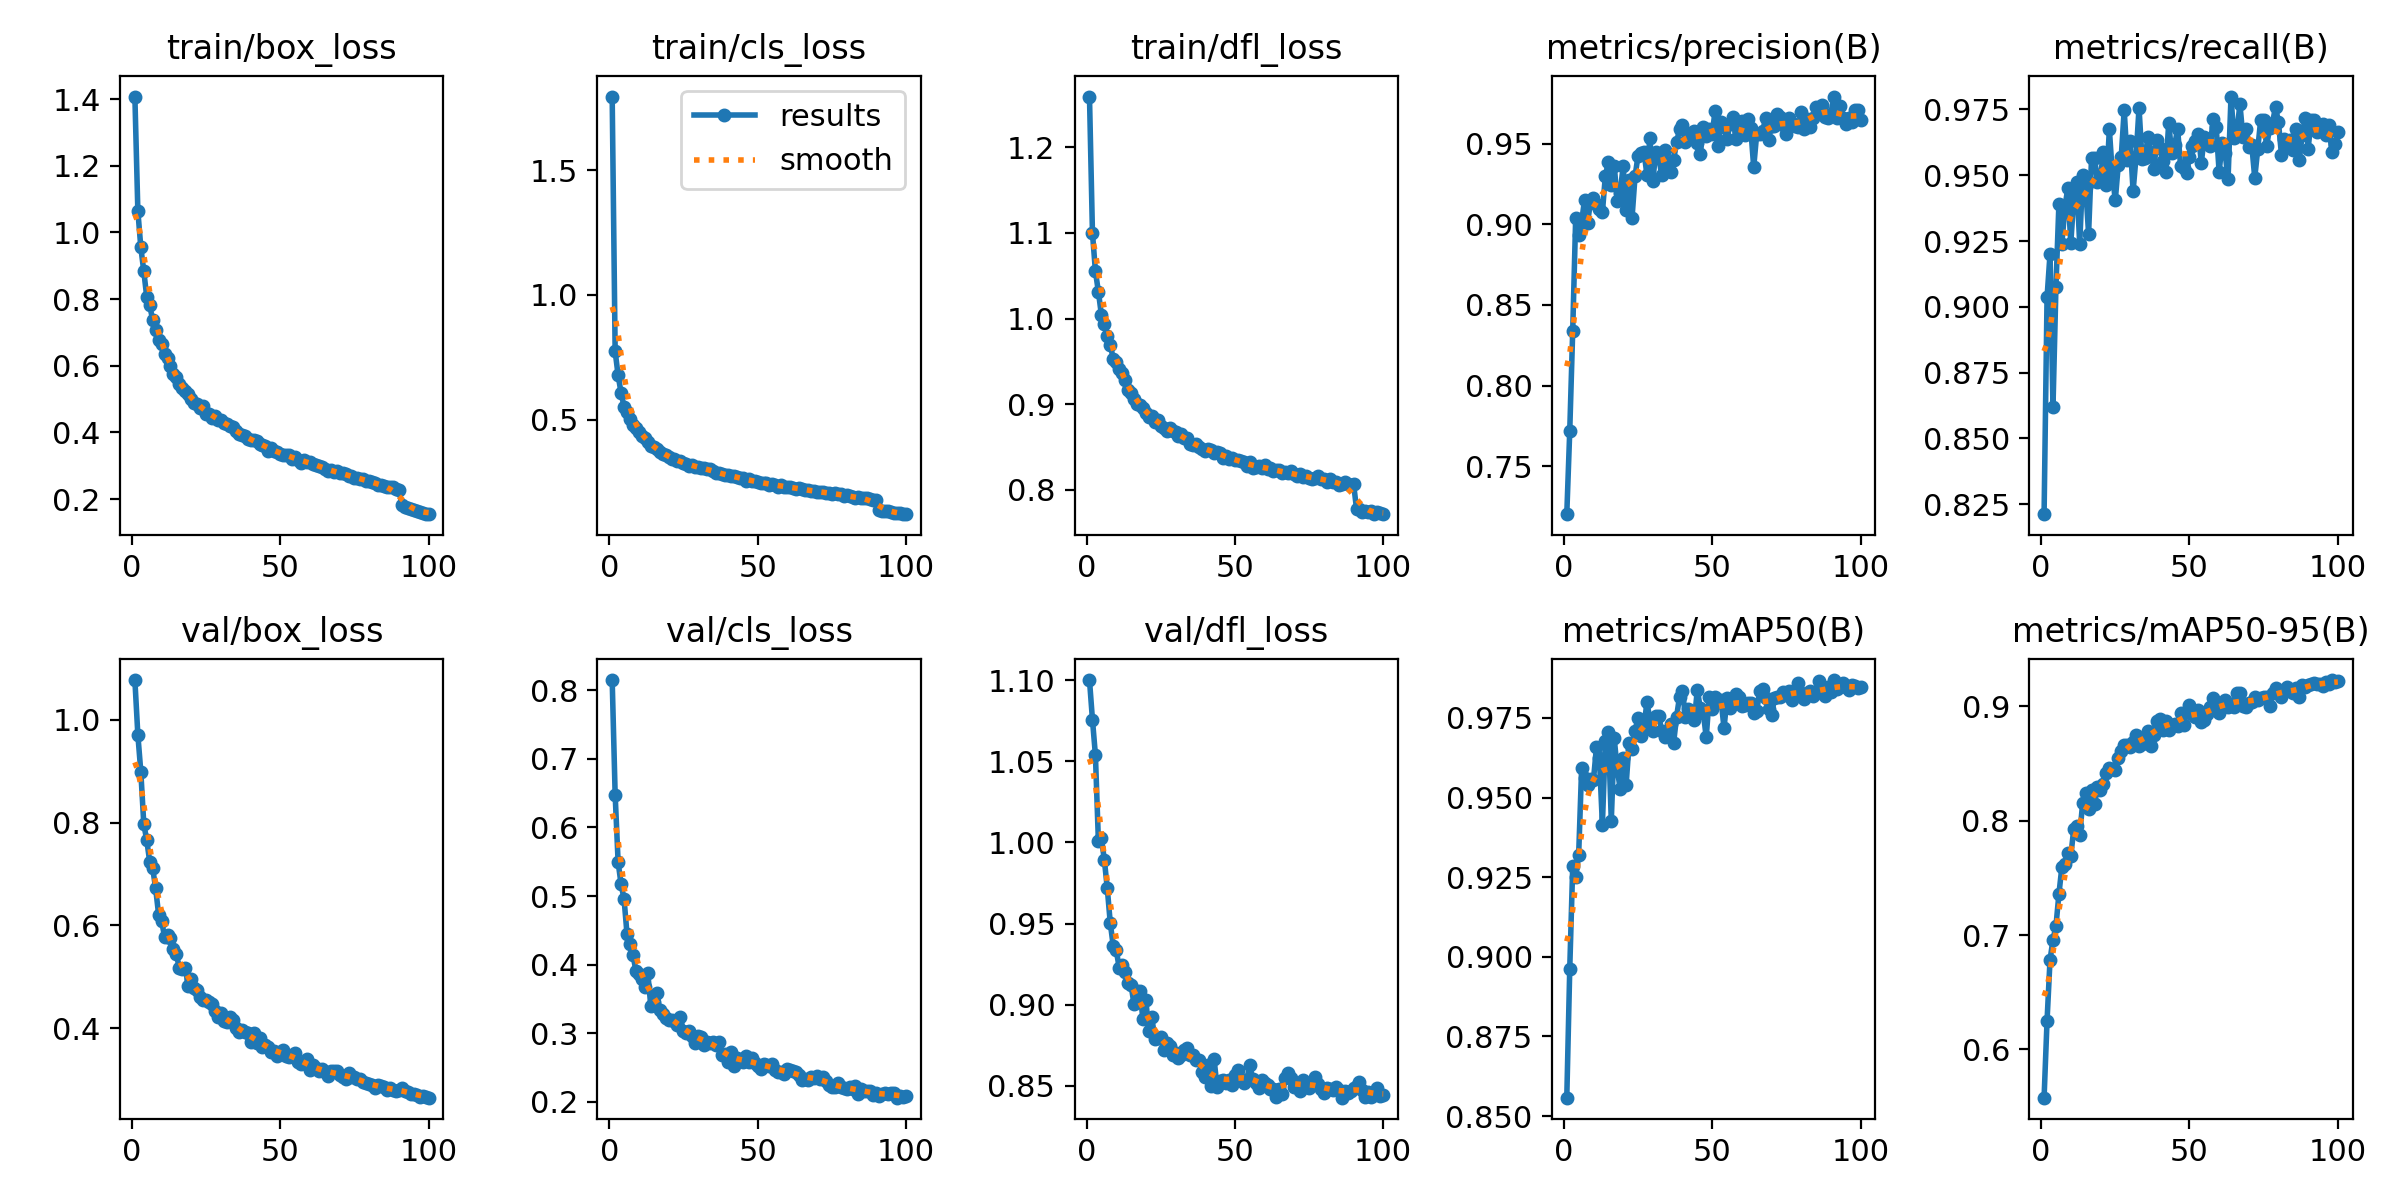

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train40/results.png', width=600)

#Predicting on test dataset

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train40/weights/best.pt conf=0.25 source={dataset.location}/test/images

/home/virtualmachine2/Desktop/Hiba
/bin/bash: /home/virtualmachine2/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Ultralytics YOLOv8.0.196 🚀 Python-3.9.18 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 2080, 7844MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/146 /home/virtualmachine2/Desktop/Hiba/stresspr/camel-behavior-2/test/images/distressed-sitting-black_mp4-0008_jpg.rf.1a85593b16bb2dab9825cb06a2d59948.jpg: 800x800 1 distressed-sitting, 2 sittings, 9.7ms
image 2/146 /home/virtualmachine2/Desktop/Hiba/stresspr/camel-behavior-2/test/images/distressed-sitting-non-manaa_mp4-0007_jpg.rf.fe93071f682185f6c4f6c1c8f1da04e1.jpg: 800x800 1 distressed-sitting, 4 sittings, 9.7ms
image 3/146 /home/virtualmachine2/Desktop/Hiba/stresspr/camel-behavior-2/test/images/distressed-sitting-red-13-_mp4-0003_jpg.rf.c87f198d430c16c0f4309895ad0b6bf4.jpg: 800x800 4 distressed-sittings, 2 sittings, 1 sleeping, 9.7ms
image 4/146 /

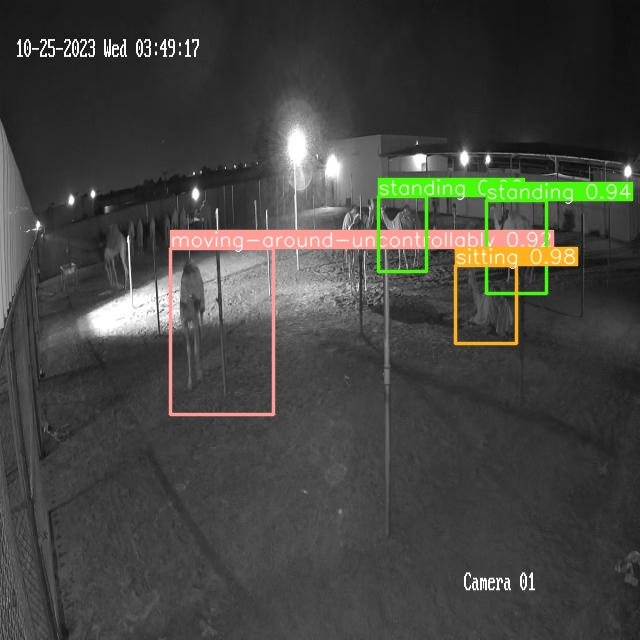

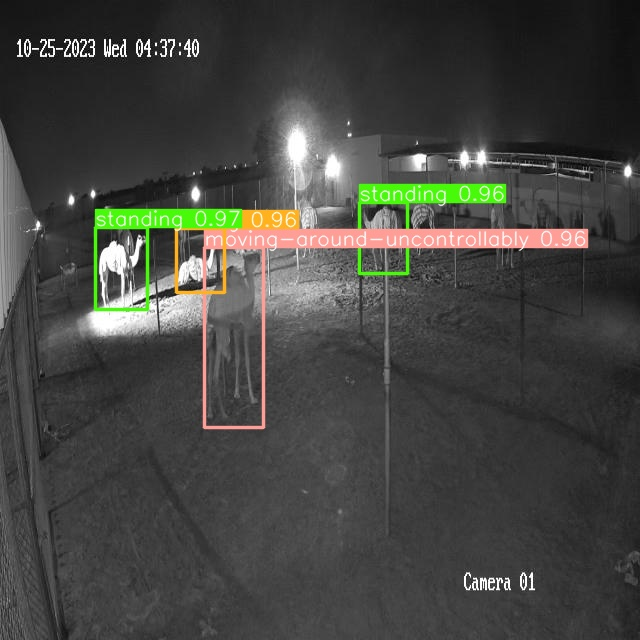

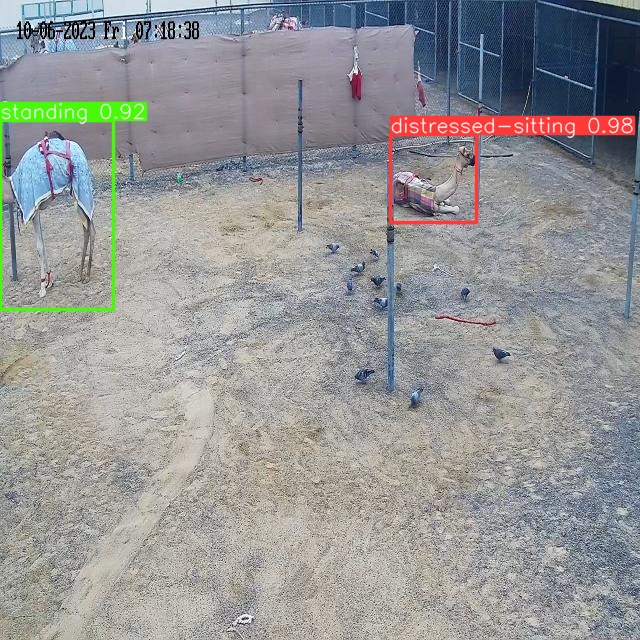

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

#Video inference - Predicting on video clips (short video clips and large)

Required libraries are YOLOv8 and OpenCV is used for handling input and output video. The trained model is loaded and OpenCV is used to read the video frame by frame, the model is used to predict the class for each frame. The bounding boxes and labels are plotted to display the frames in real time. The annotated frames are written to a video file using the cv2.VideoWriter object. The path to the output video file is specified by output_video_path. Each annotated frame is displayed in a window using cv2.imshow('Frame', annotated_frame). This allows you to see the processed video in real-time.

Handling large video files, such as a 1 GB video, can be challenging due to the high memory and CPU/GPU demands, especially when performing real-time object detection. Some strategies to manage resources efficiently and avoid system crashes are following:

*   Frame Skipping: Process every nth frame instead of every frame to reduce computational load.
*   Frame Resizing: Downscale the frames before processing to reduce the amount of data processed.
*   Efficient Memory Management: Release memory used by frames as soon as they're processed to prevent memory leaks.
*   Batch Processing: If feasible, process frames in small batches.
*   Use Hardware Acceleration: Utilize GPU acceleration if available.


In [ ]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('/home/virtualmachine2/Desktop/Hiba/runs/detect/train40/weights/best.pt')  # best.pt model file

# Path to the input video
input_video_path = '/home/virtualmachine2/Desktop/Hiba/distressed sitting - red-night.mp4'  # Update this path
# Path to the output video
output_video_path = '/home/virtualmachine2/Desktop/Hiba/nightoutput.mp4'  # Update this path

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create VideoWriter object to save output video
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Confidence score threshold
confidence_threshold = 0.05  # Set your desired threshold (0 to 1)

# Loop through frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Make predictions
    results = model(frame)

    # Annotated frame
    annotated_frame = frame.copy()

    # Iterate over results and filter based on confidence threshold
    for result in results:
        boxes = result.boxes.xyxy  # Bounding boxes
        scores = result.boxes.conf  # Confidence scores
        classes = result.boxes.cls  # Class labels

        for box, score, cls in zip(boxes, scores, classes):
            if score >= confidence_threshold:
                # Extract box coordinates
                x1, y1, x2, y2 = map(int, box)  # Convert to integer coordinates
                label = f"{model.names[int(cls)]}: {score:.2f}"

                # Draw the bounding box
                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                # Draw the label
                cv2.putText(annotated_frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Write the annotated frame to the output video
    out.write(annotated_frame)

    # Display the frame (optional)
    cv2.imshow('Frame', annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()



0: 480x800 1 distressed-sitting, 7 sittings, 1 sleeping, 7.7ms
Speed: 3.9ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 distressed-sitting, 7 sittings, 1 sleeping, 7.6ms
Speed: 4.1ms preprocess, 7.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 distressed-sitting, 7 sittings, 1 sleeping, 7.3ms
Speed: 3.6ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 distressed-sitting, 7 sittings, 1 sleeping, 7.1ms
Speed: 3.7ms preprocess, 7.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 distressed-sitting, 7 sittings, 1 sleeping, 6.9ms
Speed: 3.6ms preprocess, 6.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 distressed-sitting, 7 sittings, 1 sleeping, 6.8ms
Speed: 4.0ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 distressed-sitting, 7 sitt

In [ ]:

import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('/home/virtualmachine2/Desktop/Hiba/runs/detect/train40/weights/best.pt')  # best.pt model file

# Path to the input video
input_video_path = '/home/virtualmachine2/Desktop/Hiba/14 - abnormal movement - blue.mp4'  # Update this path
# Path to the output video
output_video_path = '/home/virtualmachine2/Desktop/Hiba/nightoutput.mp4'  # Update this path

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create VideoWriter object to save output video
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Confidence score threshold
confidence_threshold = 0.05  # Set your desired threshold (0 to 1)

# Loop through frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Make predictions
    results = model(frame)

    # Annotated frame
    annotated_frame = frame.copy()

    # Iterate over results and filter based on confidence threshold
    for result in results:
        boxes = result.boxes.xyxy  # Bounding boxes
        scores = result.boxes.conf  # Confidence scores
        classes = result.boxes.cls  # Class labels

        for box, score, cls in zip(boxes, scores, classes):
            if score >= confidence_threshold:
                # Extract box coordinates
                x1, y1, x2, y2 = map(int, box)  # Convert to integer coordinates
                label = f"{model.names[int(cls)]}: {score:.2f}"

                # Draw the bounding box
                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                # Draw the label
                cv2.putText(annotated_frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Write the annotated frame to the output video
    out.write(annotated_frame)

    # Display the frame (optional)
    cv2.imshow('Frame', annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()



0: 480x800 1 sitting, 10 standings, 7.5ms
Speed: 3.7ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 sitting, 10 standings, 7.1ms
Speed: 3.4ms preprocess, 7.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 sitting, 10 standings, 6.9ms
Speed: 3.3ms preprocess, 6.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 sitting, 9 standings, 6.9ms
Speed: 3.6ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 sitting, 10 standings, 6.8ms
Speed: 3.2ms preprocess, 6.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 sitting, 10 standings, 6.8ms
Speed: 3.1ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 sitting, 10 standings, 6.8ms
Speed: 3.4ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 sitting, 10 st

In [ ]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('/home/virtualmachine2/Desktop/Hiba/runs/detect/train40/weights/best.pt')  # best.pt model file

# Path to the input video
input_video_path = '/home/virtualmachine2/Downloads/done-Camera_01_Marmoom_Marmoom_20231005065237_20231005102143_81821005.mp4'  # Update this path
# Path to the output video
output_video_path = '/home/virtualmachine2/Desktop/Hiba/longout.mp4'  # Update this path

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create VideoWriter object to save output video
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Confidence score threshold
confidence_threshold = 0.05  # Set your desired threshold (0 to 1)

# Frame skipping factor
frame_skip = 15  # Process every 15th frame

# Loop through frames
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Skip frames to reduce processing load
    if frame_count % frame_skip != 0:
        frame_count += 1
        continue

    # Resize the frame to reduce processing time (optional)
    resized_frame = cv2.resize(frame, (640, 480))  # Resize to 640x480 or another resolution

    # Make predictions
    results = model(resized_frame)

    # Annotated frame
    annotated_frame = resized_frame.copy()

    # Iterate over results and filter based on confidence threshold
    for result in results:
        boxes = result.boxes.xyxy  # Bounding boxes
        scores = result.boxes.conf  # Confidence scores
        classes = result.boxes.cls  # Class labels

        for box, score, cls in zip(boxes, scores, classes):
            if score >= confidence_threshold:
                # Extract box coordinates
                x1, y1, x2, y2 = map(int, box)  # Convert to integer coordinates
                label = f"{model.names[int(cls)]}: {score:.2f}"

                # Draw the bounding box
                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                # Draw the label
                cv2.putText(annotated_frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Write the annotated frame to the output video
    out.write(annotated_frame)

    # Display the frame (optional)
    cv2.imshow('Frame', annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Increment frame count
    frame_count += 1

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()



0: 608x800 2 sittings, 3 standings, 71.8ms
Speed: 4.0ms preprocess, 71.8ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 sittings, 3 standings, 7.9ms
Speed: 4.8ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 sittings, 2 standings, 7.9ms
Speed: 3.5ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 sittings, 2 standings, 7.9ms
Speed: 3.3ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 sittings, 2 standings, 7.9ms
Speed: 3.5ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 sittings, 2 standings, 7.9ms
Speed: 3.3ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 sittings, 2 standings, 7.9ms
Speed: 3.5ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 sittings, 2

KeyboardInterrupt: 